#X , Y   ->  x_1:n 

       E(y|x;b) =   f( x_1:n ; b ) ->    y_1:n

#Dada una muestra D=(X,Y) de tamaño n indexadas con un variable I = list(range(n))  

#Repetir K veces el siguiente procedimiento:

# 1) Samplear con repetición de I un vector I*_k de tamaño n 

# 2) Elegir las I*_k filas de D para generar un data set D*_k (de tamaño n)

# 3) Usar D*_k para calcular un modelo de regresión f al que llameremos M*_k

# 4) Extraer de M*_k los coeficientes del modelo al cual llamaremos b*_k

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt 

In [2]:
n=50
D=np.random.rand(n,2)   #valores aleatorios, podrian ser cualquier numero
K=10000

In [3]:
I=list(range(n))
B=np.zeros((K,2)) #matriz de 0, con k filas y dos columnas
for k in range(K):
    #punto1: agarro n indices del 0 al n- 
    I_k=np.random.choice(I,size=n,replace=True)
    #punto2: del dataset D, agarro filas de los indices I_k
    D_k=D[I_k]
    #punto3: hago la regresión con D_k, donde x van a ser las filas y la primer columna (D_k[:,0])
    #y van a ser todas las filas de la segunda columna(D_k[:,1])
    M_k=sm.OLS(sm.add_constant(D_k[:,0]),D_k[:,1])
    resultado=M_k.fit()
    #punto4: me quedo con coeficientes de la regresion
    b_k=resultado.params[0] #guardo coeficientes que calcule
    B[k]=b_k

# Si quiero la distribución de los coeficientes:

# i) Calcular para cada coeficiente los cuantiles 0.025,0.25,0.5,0.75,0.9725 (en un mundo benigno, obtinese un intervalo de confianza de nivel alpha=0.95

In [4]:
np.quantile(B, 0.025)

0.6796333274259343

In [5]:
np.quantile(B, 0.25)

0.8172403057598491

In [6]:
np.quantile(B, 0.5)

1.2786406342976204

In [7]:
np.quantile(B, 0.75)

1.5147502675821312

In [8]:
np.quantile(B, 0.9725)

1.6397096814577454

# ii) Histograma de cada coeficiente

(array([[0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00,
         1.610e+03, 6.360e+03, 1.917e+03, 1.100e+02],
        [5.050e+02, 4.059e+03, 4.455e+03, 9.300e+02, 4.800e+01, 3.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]]),
 array([0.55159971, 0.67991246, 0.80822521, 0.93653796, 1.06485071,
        1.19316346, 1.32147622, 1.44978897, 1.57810172, 1.70641447,
        1.83472722]),
 <a list of 2 BarContainer objects>)

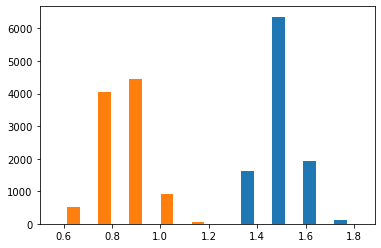

In [9]:
plt.hist(B)

# Si quiero la distribución predictiva de y^pred dado un x_nuevo, entonces:


# i) itero sobre cada uno de los B*_K (cada uno de los b*_k valores)

	# i.1) le aplico esos valores al modelo de regresión de f para predecir el valor de y^pred_k con

		# y^pred_k = f( x_nuevo ; b*_k )
		
# ii) Calcular para cada y^pred dado x_new los cuantiles 0.025,0.25,0.5,0.75,0.9725 (en un mundo benigno, obtinese un intervalo de confianza de nivel alpha=0.95

# iii) Histograma de cada y^pred que me interese


In [10]:
olsres.predict (b_k)

NameError: name 'olsres' is not defined